# TXT to JSON

In [ ]:
import json
import os
from datetime import datetime

#function to convert timestamp
def convert_timestamp(timestamp):
    #convert to desired format
    dt = datetime.fromisoformat(timestamp).replace(tzinfo=None)
    return dt.strftime("%m/%d/%Y %H:%M")

#open input file
def convert_json_to_txt(input_file, output_file):
  with open(input_file, 'r') as json_file:
    data = json.load(json_file)
  messages = data.get("messages", [])
  message_id_map = {message.get("id"): message for message in messages}

  with open(output_file, 'w', encoding= 'utf-8') as txt_file:

    for message in data.get("messages", []):
      #message details
      timestamp_str = message.get("timestamp", "No Timestamp")
      author = message.get("author", {})
      author_name = f"{author.get('name', 'Unknown Author')}"
      content = message.get("content", None)
      message_reference = message.get("reference", None)

      formatted_timestamp = convert_timestamp(timestamp_str)
      #write message details to the text file

      if message_reference:
        #get the original message using its ID
        original_message = message_id_map.get(message_reference.get("messageId"), None)
        if original_message:
          original_content = original_message.get("content", "[No Content]")
          original_user = original_message.get("author", {}).get("name", "Unknown Author")
          original_date = convert_timestamp(original_message.get("timestamp", "No Timestamp"))
          txt_file.write(f"Replying to Message: {original_user} {original_date} {original_content}\n")

      txt_file.write(f"{author_name} {formatted_timestamp}\n")
      if content:
        txt_file.write(f"{content}\n")
      #stickers
      stickers = message.get("stickers", [])
      for sticker in stickers:
        sticker_name = sticker.get("name", "Unknown Sticker")
        sticker_format = sticker.get("format", "Unknown Format")
        txt_file.write(f"Sticker: {sticker_name} (Format: {sticker_format})\n")

      #attachments
      attachments = message.get("attachments", [])
      for attachment in attachments:
        txt_file.write(f"Attachment: {attachment.get('url', '[No URL]')}\n")

      #reactions
      reactions = message.get("reactions", [])
      if reactions:
        reaction_summary = ', '.join([f"{reaction['emoji'].get('name', 'Unknown Emoji')} ({reaction.get('count', 0)})" for reaction in reactions])
        txt_file.write(f"Reactions: {reaction_summary}\n")

      #add a blank line between messages
      txt_file.write("\n")

  print(f"Converted JSON data has been saved to {output_file}")

 

# Function to process all JSON files in a folder
def process_json_files(input_folder, output_folder):
    for filename in os.listdir(input_folder):
      input_file = os.path.join(input_folder, filename)
      output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.txt")

      #convert the JSON to a text file
      convert_json_to_txt(input_file, output_file)

input_folder = "filtered"
output_folder = "filtered_TXT"

# Process all JSON files in the folder
process_json_files(input_folder, output_folder)

# Preprocessing

In [ ]:
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
import re
import json
import spacy


# Load spaCy's English model
# nlp = spacy.load('en_core_web_sm')

with open('stopwords-iso.json', 'r', encoding='utf-8') as file:
    stopwords_iso = json.load(file)

stopwords = set(nltk_stopwords.words('english'))
custom_stopwords = set(['server', 'joined','scroll','scrolls','papyrus','image'])
stopwords.update(custom_stopwords)
stopwords.update(stopwords_iso['en'])
# stopwords.update(nlp.Defaults.stop_words)

def preprocess_text(text):

    # Convert text to lowercase
    text = text.lower()
    
    # Remove function definitions (without removing punctuation or capitalization)
    text = re.sub(r'\b[a-zA-Z_][a-zA-Z0-9_]*\s*\([^)]*\)\s*', '', text)
    
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters but keep emojis
    text = re.sub(r'[^\w\s\u263A-\U0001F9FF\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\u2600-\u26FF]', '', text)
    
    # Remove stopwords
    tokens = text.split()
    tokens = [token for token in tokens if token not in stopwords]
    
    # return ' '.join(tokens)
    return text

def preprocess_json(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    for message in data.get('messages', []):
        if message.get('content'):
            message['content'] = preprocess_text(message['content'])

    with open(output_file, 'w', encoding='utf-8') as file:
        json.dump(data, file, indent=4)

    print(f'Preprocessed data has been saved to {output_file}')

 
def preprocess_all_files(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        output_file = os.path.join(output_folder, filename)
        preprocess_json(input_file, output_file)


input_folder = 'filtered2'
output_folder = 'preprocessed3'

preprocess_all_files(input_folder, output_folder)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\summerm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessed data has been saved to preprocessed3\Vesuvius Challenge - code - 3D FFT [1165255454037917797]_filtered.json
Preprocessed data has been saved to preprocessed3\Vesuvius Challenge - code - Code tip&#x3a; mirror the data server directory structure locally [1162854815731306666]_filtered.json
Preprocessed data has been saved to preprocessed3\Vesuvius Challenge - code - Colab recommendation for persistent storage&#x3f; [1163820413621633124]_filtered.json
Preprocessed data has been saved to preprocessed3\Vesuvius Challenge - code - Constraint solvers for bruteforcing missing_ambiguous letters [1163049828721369118]_filtered.json
Preprocessed data has been saved to preprocessed3\Vesuvius Challenge - code - Permission denied when sshing from paperspace machine (web browser works okay) [1163661867185606737]_filtered.json
Preprocessed data has been saved to preprocessed3\Vesuvius Challenge - code - Speed-check your image loading [1164605201408348251]_filtered.json
Preprocessed data has

# Counting Word Frequency

In [19]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

def count_words_in_json(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    word_counter = Counter()

    for message in data.get('messages', []):
        if message.get('content'):
            words = message['content'].split()
            word_counter.update(words)

    return word_counter

 

def count_words_in_all_files(input_folder):
    overall_counter = Counter()

    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        word_counter = count_words_in_json(input_file)
        overall_counter.update(word_counter)

    return overall_counter

input_folder = 'preprocessed'
word_counts = count_words_in_all_files(input_folder)

# Print the 10 most common words
print(word_counts.most_common(50))

[('ink', 1536), ('segment', 1410), ('data', 1258), ('segmentation', 1133), ('slice', 947), ('segments', 934), ('yeah', 912), ('time', 863), ('slices', 782), ('bit', 650), ('volume', 629), ('surface', 590), ('model', 581), ('letters', 581), ('detection', 554), ('people', 513), ('lot', 498), ('layers', 496), ('ofs', 482), ('size', 437), ('nice', 394), ('pretty', 389), ('lol', 389), ('sheet', 383), ('read', 375), ('fragment', 375), ('idea', 370), ('set', 369), ('start', 358), ('hard', 353), ('fragments', 340), ('tif', 339), ('layer', 334), ('file', 331), ('prize', 318), ('step', 318), ('interpolation', 313), ('code', 312), ('images', 311), ('training', 298), ('sense', 287), ('version', 284), ('algorithm', 281), ('question', 280), ('sheets', 279), ('hari', 279), ('stuff', 277), ('lines', 274), ('left', 272), ('running', 271)]


## 50 Most Common

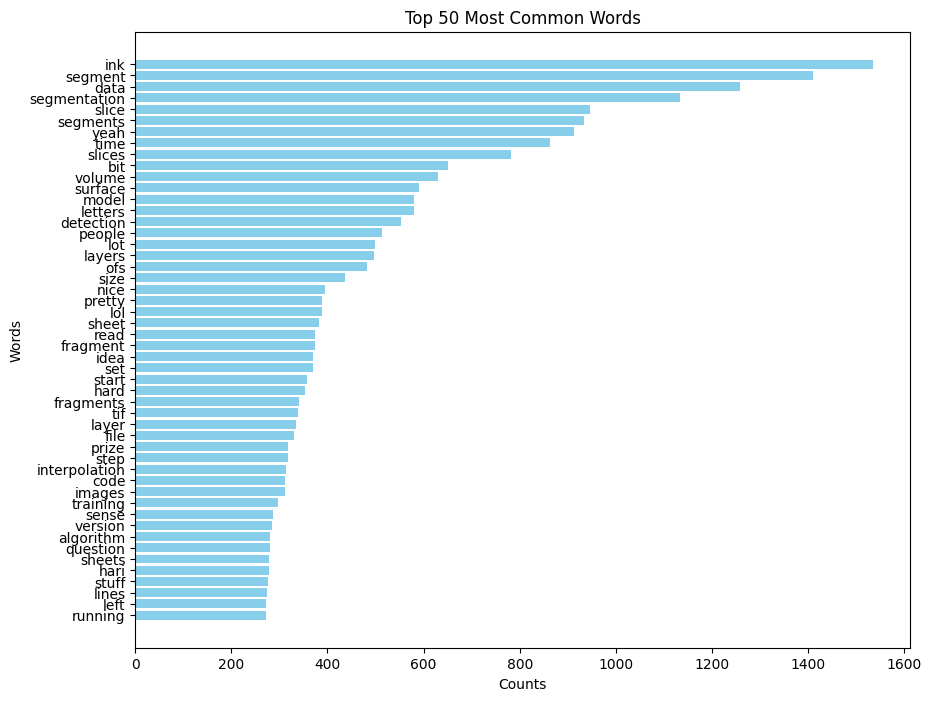

In [20]:
#Get the 50most common words
top_words = word_counts.most_common(50)

# Separate the words and their counts
words, counts = zip(*top_words)

# Create the bar graph
# Create the horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Top 50 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

[(('ink', 'detection'), 252), (('hari', 'seldon'), 155), (('started', 'thread'), 119), (('step', 'size'), 83), (('grand', 'prize'), 77), (('seldon', 'ben'), 70), (('slice', 'ofs'), 68), (('surface', 'volume'), 67), (('volcart', 'info'), 41), (('ofs', 'start'), 41), (('ancient', 'greek'), 38), (('ofs', 'interpolation'), 36), (('info', 'info'), 33), (('ink', 'signal'), 32), (('brett', 'olsen'), 30), (('entries', 'entries'), 30), (('segmentation', 'team'), 29), (('monster', 'segment'), 28), (('interpolation', 'window'), 28), (('anchor', 'slice'), 28), (('training', 'data'), 26), (('ofs', 'ofs'), 24), (('volume', 'cartographer'), 22), (('vesuvius', 'challenge'), 22), (('slice', 'slice'), 22), (('data', 'datareplace'), 19), (('ground', 'truth'), 19), (('yao', 'hsiao'), 19), (('train', 'model'), 18), (('pen', 'tool'), 18), (('obj', 'file'), 18), (('algorithm', 'slice'), 18), (('machine', 'learning'), 17), (('detect', 'ink'), 17), (('optical', 'flow'), 17), (('surface', 'volumes'), 17), (('ta

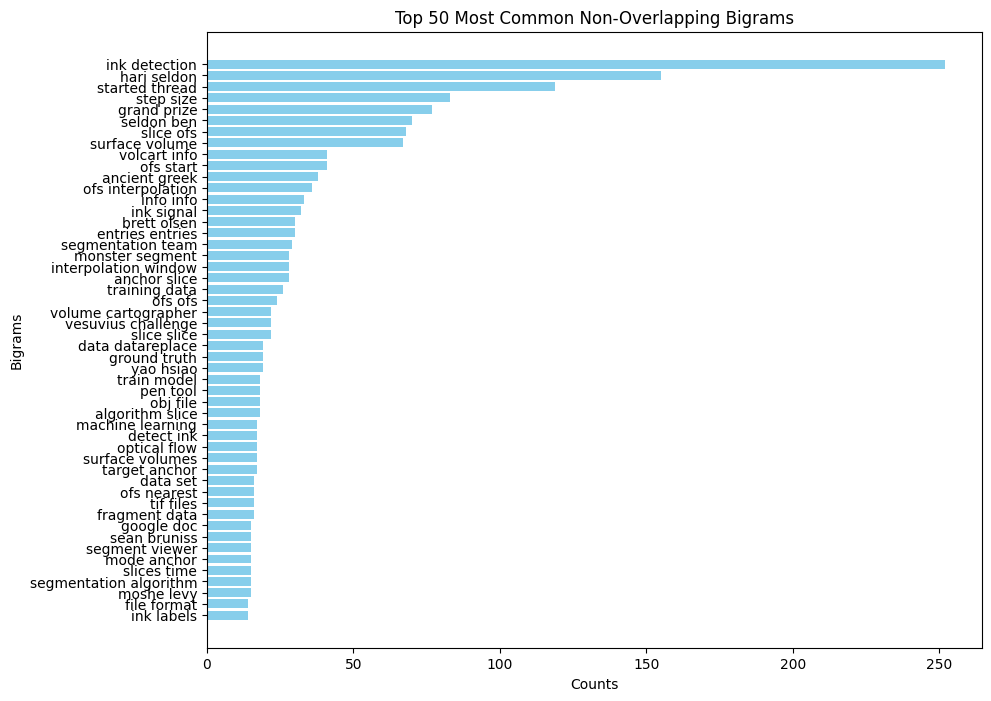

In [5]:
from nltk import bigrams
from collections import Counter
import os
import json

import matplotlib.pyplot as plt

def count_non_overlapping_bigrams(words):
    return [(words[i], words[i + 1]) for i in range(0, len(words) - 1, 2)]

def count_bigrams_in_json(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    bigram_counter = Counter()

    for message in data.get('messages', []):
        if message.get('content'):
            words = message['content'].split()
            bigram_counter.update(count_non_overlapping_bigrams(words))

    return bigram_counter

def count_bigrams_in_all_files(input_folder):
    overall_bigram_counter = Counter()

    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        bigram_counter = count_bigrams_in_json(input_file)
        overall_bigram_counter.update(bigram_counter)

    return overall_bigram_counter

input_folder = 'preprocessed'
bigram_counts = count_bigrams_in_all_files(input_folder)

# Print the 50 most common bigrams
print(bigram_counts.most_common(50))

# Get the 50 most common bigrams
top_bigrams = bigram_counts.most_common(50)

# Separate the bigrams and their counts
bigrams, counts = zip(*top_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigrams]

# Create the horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(bigram_labels, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.title('Top 50 Most Common Non-Overlapping Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

[(('ink', 'detection'), 470), (('hari', 'seldon'), 228), (('seldon', 'ben'), 217), (('slice', 'ofs'), 152), (('step', 'size'), 135), (('grand', 'prize'), 131), (('started', 'thread'), 119), (('surface', 'volume'), 117), (('info', 'info'), 68), (('ancient', 'greek'), 66), (('ink', 'signal'), 65), (('interpolation', 'window'), 64), (('volcart', 'info'), 63), (('entries', 'entries'), 62), (('ofs', 'interpolation'), 60), (('training', 'data'), 58), (('anchor', 'slice'), 54), (('segmentation', 'team'), 53), (('monster', 'segment'), 46), (('ofs', 'start'), 46), (('target', 'slice'), 44), (('slice', 'slice'), 43), (('vesuvius', 'challenge'), 42), (('brett', 'olsen'), 40), (('surface', 'volumes'), 39), (('data', 'set'), 38), (('volume', 'cartographer'), 37), (('tif', 'files'), 36), (('optical', 'flow'), 36), (('segment', 'viewer'), 34), (('pen', 'tool'), 34), (('seg', 'tool'), 34), (('manually', 'adjusted'), 33), (('kaggle', 'data'), 32), (('detect', 'ink'), 31), (('train', 'model'), 30), (('m

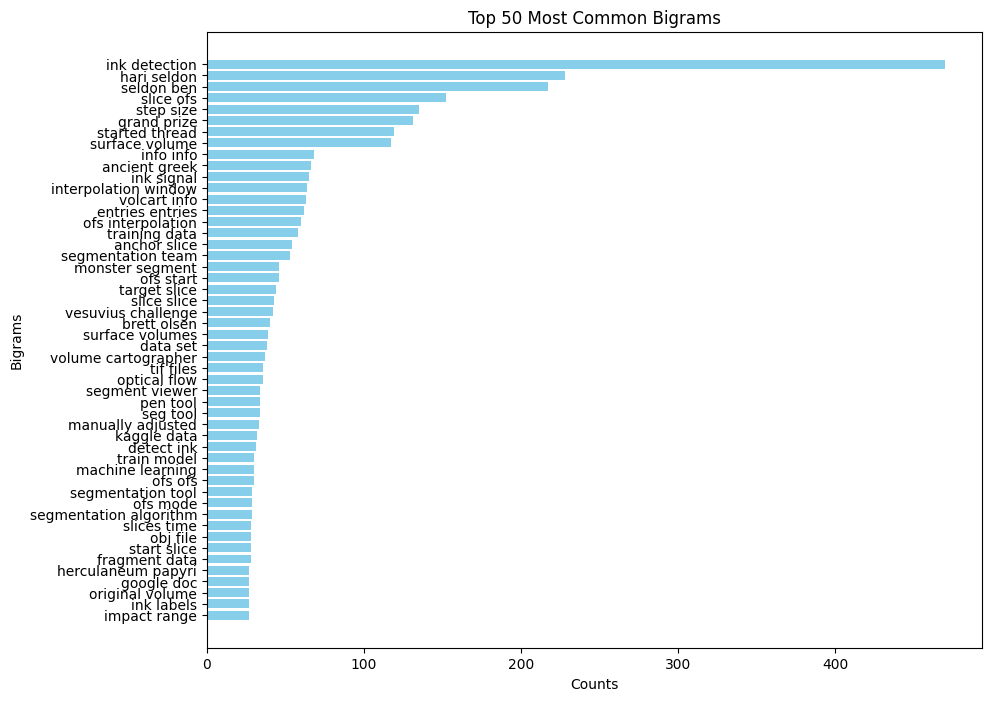

In [3]:
from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt
import os
import json

def count_bigrams_in_json(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    bigram_counter = Counter()

    for message in data.get('messages', []):
        if message.get('content'):
            words = message['content'].split()
            bigram_counter.update(bigrams(words))

    return bigram_counter

def count_bigrams_in_all_files(input_folder):
    overall_bigram_counter = Counter()

    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        bigram_counter = count_bigrams_in_json(input_file)
        overall_bigram_counter.update(bigram_counter)

    return overall_bigram_counter

input_folder = 'preprocessed'
bigram_counts = count_bigrams_in_all_files(input_folder)

# Print the 50 most common bigrams
print(bigram_counts.most_common(50))

# Get the 50 most common bigrams
top_bigrams = bigram_counts.most_common(50)

# Separate the bigrams and their counts
bigrams, counts = zip(*top_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigrams]

# Create the horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(bigram_labels, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.title('Top 50 Most Common Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

[(('hari', 'seldon', 'ben'), 122), (('anchor', 'slice', 'ofs'), 22), (('info', 'info', 'info'), 22), (('info', 'annotation', 'annotationfalsefalsefalse'), 21), (('entries', 'entries', 'entries'), 19), (('ofs', 'ofs', 'mode'), 16), (('target', 'slice', 'ofs'), 12), (('ink', 'detection', 'model'), 11), (('slice', 'ofs', 'start'), 11), (('volcart', 'info', 'loading'), 8), (('start', 'algorithm', 'slice'), 8), (('ofs', 'nearest', 'target'), 8), (('nice', 'vcconvertpointset', 'pointsetvcps'), 8), (('anchor', 'ofs', 'start'), 7), (('slice', 'ofs', 'anchor'), 7), (('masterrowindex', 'pointsindex', 'mastercloudheight'), 7), (('pointssize', 'error', 'masterrowindex'), 7), (('pointsindex', 'mastercloudheight', 'pointssize'), 7), (('error', 'masterrowindex', 'pointsindex'), 7), (('ofs', 'updated', 'target'), 7), (('slice', 'ofs', 'step'), 7), (('layers', 'nice', 'vclayersfromppm'), 7), (('slicepointsobj', 'nice', 'vcrender'), 7), (('data', 'datareplace', 'data'), 6), (('datareplace', 'data', 'dat

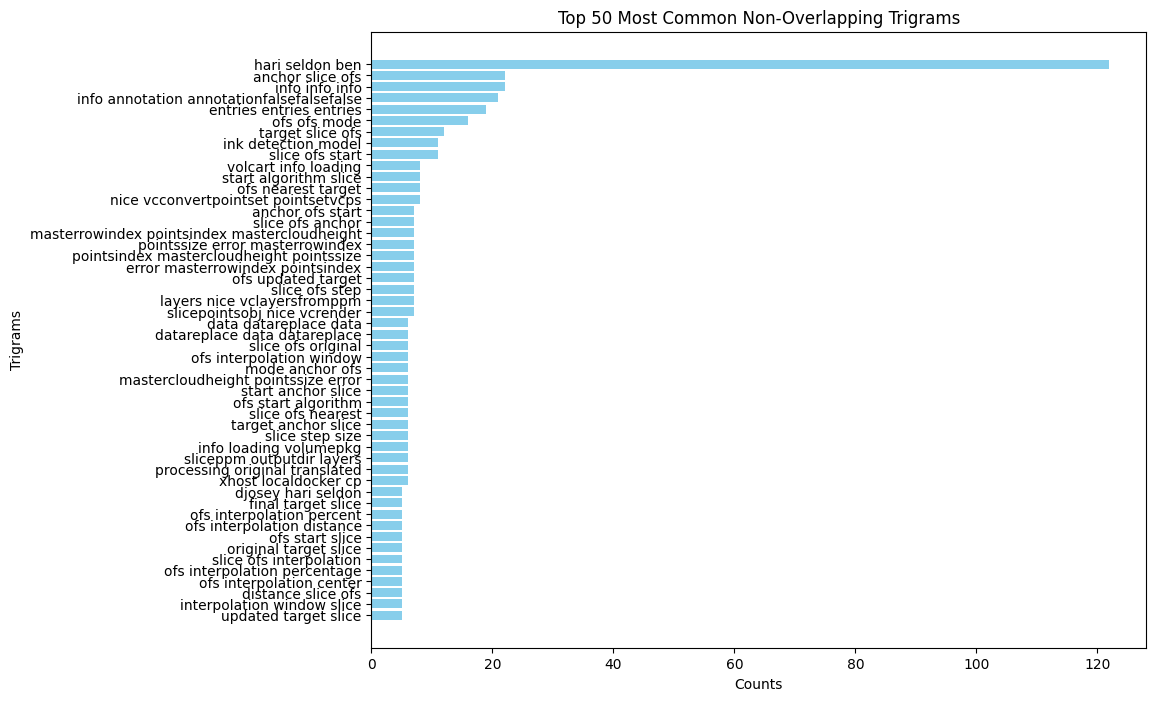

In [6]:
from nltk import trigrams
from collections import Counter
import os
import json

import matplotlib.pyplot as plt

def count_non_overlapping_trigrams(words):
    return [(words[i], words[i + 1], words[i + 2]) for i in range(0, len(words) - 2, 3)]

def count_trigrams_in_json(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    trigram_counter = Counter()

    for message in data.get('messages', []):
        if message.get('content'):
            words = message['content'].split()
            trigram_counter.update(count_non_overlapping_trigrams(words))

    return trigram_counter

def count_trigrams_in_all_files(input_folder):
    overall_trigram_counter = Counter()

    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        trigram_counter = count_trigrams_in_json(input_file)
        overall_trigram_counter.update(trigram_counter)

    return overall_trigram_counter

input_folder = 'preprocessed'
trigram_counts = count_trigrams_in_all_files(input_folder)

# Print the 50 most common trigrams
print(trigram_counts.most_common(50))

# Get the 50 most common trigrams
top_trigrams = trigram_counts.most_common(50)

# Separate the trigrams and their counts
trigrams, counts = zip(*top_trigrams)
trigram_labels = [' '.join(trigram) for trigram in trigrams]

# Create the horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(trigram_labels, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Trigrams')
plt.title('Top 50 Most Common Non-Overlapping Trigrams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

[(('hari', 'seldon', 'ben'), 217), (('info', 'info', 'info'), 64), (('entries', 'entries', 'entries'), 60), (('anchor', 'slice', 'ofs'), 46), (('target', 'slice', 'ofs'), 39), (('ofs', 'ofs', 'mode'), 29), (('slice', 'ofs', 'start'), 29), (('ink', 'detection', 'model'), 23), (('error', 'masterrowindex', 'pointsindex'), 21), (('masterrowindex', 'pointsindex', 'mastercloudheight'), 21), (('pointsindex', 'mastercloudheight', 'pointssize'), 21), (('info', 'annotation', 'annotationfalsefalsefalse'), 21), (('slice', 'ofs', 'interpolation'), 19), (('mastercloudheight', 'pointssize', 'error'), 19), (('pointssize', 'error', 'masterrowindex'), 19), (('annotation', 'annotationfalsefalsefalse', 'info'), 19), (('annotationfalsefalsefalse', 'info', 'annotation'), 19), (('ofs', 'interpolation', 'window'), 18), (('data', 'datareplace', 'data'), 17), (('datareplace', 'data', 'datareplace'), 17), (('step', 'size', 'ofs'), 17), (('ink', 'detection', 'models'), 16), (('ofs', 'mode', 'anchor'), 16), (('mod

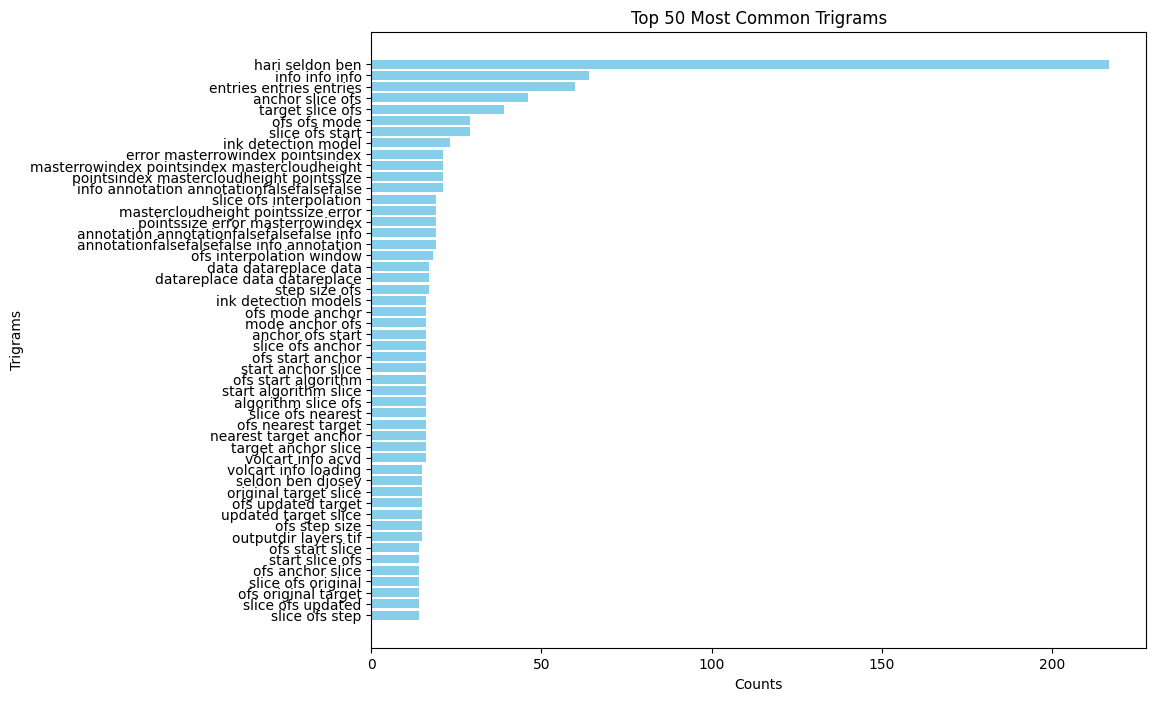

In [4]:
from nltk import trigrams
from collections import Counter
import os
import json

import matplotlib.pyplot as plt

def count_trigrams_in_json(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    trigram_counter = Counter()

    for message in data.get('messages', []):
        if message.get('content'):
            words = message['content'].split()
            trigram_counter.update(trigrams(words))

    return trigram_counter

def count_trigrams_in_all_files(input_folder):
    overall_trigram_counter = Counter()

    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        trigram_counter = count_trigrams_in_json(input_file)
        overall_trigram_counter.update(trigram_counter)

    return overall_trigram_counter

input_folder = 'preprocessed'
trigram_counts = count_trigrams_in_all_files(input_folder)

# Print the 50 most common trigrams
print(trigram_counts.most_common(50))

# Get the 50 most common trigrams
top_trigrams = trigram_counts.most_common(50)

# Separate the trigrams and their counts
trigrams, counts = zip(*top_trigrams)
trigram_labels = [' '.join(trigram) for trigram in trigrams]

# Create the horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(trigram_labels, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Trigrams')
plt.title('Top 50 Most Common Trigrams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

# Sentiment Analysis

## Sentiment Analysis Using BERT

### Not finetuned

In [15]:
#Sentiment Analysis Using BERT
import os
import tensorflow as tf
import json
from transformers import BertTokenizer
from transformers import TFBertForSequenceClassification

#load in the dataset
def get_all_documents(input_folder):
    all_documents = []
    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        with open(input_file, 'r', encoding='utf-8') as file:
            data = json.load(file)
            channel_name = data.get('channel', 'Unknown Channel')
            for message in data.get('messages', []):
                if message.get('content'):
                    user = message.get('author', {}).get('name', 'Unknown User')
                    timestamp = message.get('timestamp', 'No Timestamp')
                    content = message.get('content', '')
                    all_documents.append({
                    'channel': channel_name,
                    'user': user,
                    'timestamp': timestamp,
                    'content': content
                    })

    return all_documents

input_folder = 'preprocessed'
all_documents = get_all_documents(input_folder)

#load BERT
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
encoded_input = tokenizer([doc['content'] for doc in all_documents[:50]], padding=True, truncation=True, return_tensors='tf')

print("Tokenization Complete")

#load the pretrained BERT model
model = TFBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', num_labels=2)

batch_size = 16
all_probabilities = []
for batch in tf.data.Dataset.from_tensor_slices((encoded_input['input_ids'],)).batch(batch_size):
    # Perform inference
    outputs = model(batch)
    logits = outputs.logits

    # Convert logits to probabilities using softmax
    probabilities = tf.nn.softmax(logits, axis=-1)

    # Get the predicted class (0 or 1)
    predicted_classes = tf.argmax(probabilities, axis=-1).numpy()
    all_probabilities.append(predicted_classes)

#combine all batches
predicted_classes = tf.concat(all_probabilities, axis=0).numpy()

#create a dataframe with the results
import pandas as pd
df_sentiments = pd.DataFrame({
    'channel': [doc['channel'] for doc in all_documents[:50]],
    'user': [doc['user'] for doc in all_documents[:50]],
    'timestamp': [doc['timestamp'] for doc in all_documents[:50]],
    'content': [doc['content'] for doc in all_documents[:50]],
    'sentiment': ['Positive' if sentiment == 1 else 'Negative' for sentiment in predicted_classes],
    'raw_sentiment': predicted_classes
})

#save the dataframe to an excel file
output_file = 'Excels/sentiment_analysis_results_BERT_preprocessed.xlsx'
df_sentiments.to_excel(output_file, index=False)

print(f"Sentiment analysis results have been saved to {output_file}")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Tokenization Complete


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['distilbert.transformer.layer.1.attention.k_lin.bias', 'distilbert.transformer.layer.2.ffn.lin1.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.3.attention.q_lin.weight', 'distilbert.transformer.layer.2.ffn.lin2.bias', 'distilbert.transformer.layer.4.attention.q_lin.weight', 'distilbert.transformer.layer.5.ffn.lin1.weight', 'distilbert.transformer.layer.2.attention.v_lin.weight', 'distilbert.transformer.layer.1.ffn.lin1.bias', 'distilbert.transformer.layer.2.attention.out_lin.bias', 'distilbert.transformer.layer.1.ffn.lin2.bias', 'distilbert.transformer.layer.2.sa_layer_norm.weight', 'distilbert.transformer.layer.3.sa_layer_norm.bias', 'distilbert.transformer.layer.4.ffn.lin2.bias', 'distilbert.transformer.layer.5.ffn.lin1.bias', 'pre_classifier.weight', 'distilbert.embed

Sentiment analysis results have been saved to Excels/sentiment_analysis_results_BERT_preprocessed.xlsx


### Finetuned

In [12]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

# Load the Excel file with VADER sentiment labels
excel_file = "Excels/sentiment_analysis_results_VADER_preprocessed3.xlsx"
df_sentiments = pd.read_excel(excel_file)

# Encode sentiment labels: Negative -> 0, Neutral -> 1, Positive -> 2
sentiment_label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}
df_sentiments["label"] = df_sentiments["sentiment"].map(sentiment_label_map)

# Drop any missing values (optional)
df_sentiments = df_sentiments.dropna(subset=["content", "label"])

# Load tokenizer & model for `cardiffnlp/twitter-roberta-base-sentiment-latest`
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# Tokenize the content column
tokens = tokenizer(
    df_sentiments["content"].tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="tf"
)

# Convert labels to tensor format
labels = tf.convert_to_tensor(df_sentiments["label"].values)

# Convert TensorFlow tensors to NumPy arrays
input_ids_np = np.array(tokens["input_ids"])
labels_np = np.array(labels)

# Split into training and validation sets
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    input_ids_np, labels_np, test_size=0.1, random_state=42
)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(16)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ["accuracy"]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

model.fit(train_dataset, validation_data=val_dataset, epochs=10, callbacks=[early_stopping])

# Save the model and tokenizer
model.save_pretrained("fine_tuned_roberta_sentiment")
tokenizer.save_pretrained("fine_tuned_roberta_sentiment")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
1035/1035 [==============================] - 12703s 12s/step - loss: 0.4313 - accuracy: 0.8326 - val_loss: 0.2724 - val_accuracy: 0.8946
Epoch 2/10
1035/1035 [==============================] - 12662s 12s/step - loss: 0.2172 - accuracy: 0.9228 - val_loss: 0.2149 - val_accuracy: 0.9283
Epoch 3/10
1035/1035 [==============================] - 12659s 12s/step - loss: 0.1540 - accuracy: 0.9462 - val_loss: 0.2298 - val_accuracy: 0.9321


('fine_tuned_roberta_sentiment\\tokenizer_config.json',
 'fine_tuned_roberta_sentiment\\special_tokens_map.json',
 'fine_tuned_roberta_sentiment\\vocab.json',
 'fine_tuned_roberta_sentiment\\merges.txt',
 'fine_tuned_roberta_sentiment\\added_tokens.json',
 'fine_tuned_roberta_sentiment\\tokenizer.json')

In [21]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

import os
model_path = os.path.abspath(r"C:\Users\summerm\Downloads\Vesuvius Discord Study\Vesuvius Discord Study\fine_tuned_roberta_sentiment")
model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

import numpy as np

# Tokenize all messages
all_tokens = tokenizer(
    df_sentiments["content"].tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="tf"
)

# Get predictions
all_predictions = model.predict(all_tokens)

# Convert logits to class labels (0 = Negative, 1 = Neutral, 2 = Positive)
df_sentiments["predicted_label"] = np.argmax(all_predictions.logits, axis=1)

# Map numerical labels back to sentiment categories
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
df_sentiments["predicted_sentiment"] = df_sentiments["predicted_label"].map(label_map)

# Save predictions to a new Excel file
df_sentiments.to_excel("Excels/sentiment_analysis_with_BERT.xlsx", index=False)

print("Predictions saved to Excels/sentiment_analysis_with_BERT.xlsx")


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at C:\Users\summerm\Downloads\Vesuvius Discord Study\Vesuvius Discord Study\fine_tuned_roberta_sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


575/575 [==============================] - 5262s 9s/step
Predictions saved to Excels/sentiment_analysis_with_BERT.xlsx


In [22]:
# Compare VADER and BERT results
df_mismatches = df_sentiments[df_sentiments["sentiment"] != df_sentiments["predicted_sentiment"]]

# Save mismatches to another file for review
df_mismatches.to_excel("Excels/mismatched_sentiments.xlsx", index=False)

print(f"Total mismatches: {len(df_mismatches)}")

Total mismatches: 1068


In [ ]:
#ChatGPT example 
from transformers import BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments
from datasets import load_dataset

# Step 1: Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# Step 2: Prepare the dataset
# Let's assume your Discord messages are in a text file, one message per line.
dataset = load_dataset('text', data_files={'train': 'discord_messages.txt'})

# Step 3: Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, return_tensors="pt")

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Step 4: Define the TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',            # Output directory for saving model checkpoints
    num_train_epochs=3,                # Number of epochs
    per_device_train_batch_size=16,    # Batch size for training
    save_steps=10_000,                 # Save model every 10,000 steps
    save_total_limit=2,                # Keep only 2 most recent checkpoints
    logging_dir='./logs',              # Directory for storing logs
    logging_steps=200,                 # Log every 200 steps
)

# Step 5: Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
)

# Step 6: Start fine-tuning the model
trainer.train()

## Sentiment Analysis Using VADER

### Not finetuned

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#Sentiment Analysis Using VADER
import os
import tensorflow as tf
import json
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import TFBertForSequenceClassification

#load in the dataset
def get_all_documents(input_folder):
    all_documents = []
    for filename in os.listdir(input_folder):
        input_file = os.path.join(input_folder, filename)
        with open(input_file, 'r', encoding='utf-8') as file:
            data = json.load(file)
            channel_name = data.get('channel', 'Unknown Channel')
            for message in data.get('messages', []):
                if message.get('content'):
                    user = message.get('author', {}).get('name', 'Unknown User')
                    timestamp = message.get('timestamp', 'No Timestamp')
                    content = message.get('content', '')
                    all_documents.append({
                    'channel': channel_name,
                    'user': user,
                    'timestamp': timestamp,
                    'content': content
                    })

    return all_documents

input_folder = 'preprocessed3'

all_documents = get_all_documents(input_folder)
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
# can edit the thresholds to change the sentiment categories   
    if compound_score >= 0.2:
        return 'Positive'
    elif compound_score >= -0.2:
        return 'Neutral'
    else:
        return 'Negative'
sentiments = []
for doc in all_documents:
  sentiment = get_vader_sentiment(doc['content'])
  sentiments.append(sentiment)

#create dataframe with results
import pandas as pd
df_sentiments = pd.DataFrame({
    'channel': [doc['channel'] for doc in all_documents],
    'user': [doc['user'] for doc in all_documents],
    'timestamp': [doc['timestamp'] for doc in all_documents],
    'content': [doc['content'] for doc in all_documents],
    'sentiment': sentiments,
})

#save the dataframe to an excel file
output_file = 'Excels/sentiment_analysis_results_VADER_preprocessed3.xlsx'
df_sentiments.to_excel(output_file, index=False)

print(f"Sentiment analysis results have been saved to {output_file}")

c:\Users\summerm\Downloads\Vesuvius Discord Study\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Sentiment analysis results have been saved to Excels/sentiment_analysis_results_VADER_preprocessed3.xlsx


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.DataFrame(data_records)

# Map sentiment labels to integers
label_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
df['label'] = df['sentiment'].map(label_mapping)

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['content'], df['label'], test_size=0.2, random_state=42
)

In [1]:
import pandas as pd
import ast
import json

# Load the Excel file.
file_path = "Excels/sentiment_analysis_results_VADER_preprocessed2_ALL_emojis.xlsx"
df = pd.read_excel(file_path)

# --- Clean User Names ---
# Remove any leading '.' so that '.lukeboi' becomes 'lukboi'
df["user"] = df["user"].apply(lambda x: x.lstrip('.') if isinstance(x, str) else x)

# --- Timestamp Parsing ---
def parse_timestamp(ts):
    try:
        # Try parsing with fractional seconds.
        return pd.to_datetime(ts, format="%Y-%m-%dT%H:%M:%S.%f%z")
    except ValueError:
        # Fallback: parse without fractional seconds.
        return pd.to_datetime(ts, format="%Y-%m-%dT%H:%M:%S%z")

df["timestamp"] = df["timestamp"].apply(parse_timestamp)
# Format timestamp as full date "YYYY-MM-DD"
df["timestamp"] = df["timestamp"].dt.strftime("%Y-%m-%d")

# --- Extract Category from 'channel' ---
def extract_category(channel_val):
    """
    Extracts the 'category' value from a field that could be a dict or a string representation.
    """
    try:
        if isinstance(channel_val, dict):
            return channel_val.get("category", "")
        else:
            # Convert string representation to dictionary.
            d = ast.literal_eval(channel_val)
            if isinstance(d, dict):
                return d.get("category", "")
            else:
                return channel_val
    except Exception:
        return channel_val

df["category"] = df["channel"].apply(extract_category)

# Restrict the DataFrame to columns we need.
df = df[["timestamp", "user", "sentiment", "category"]]

# Convert the DataFrame to JSON.
data_records = df.to_dict(orient="records")
data_json = json.dumps(data_records, ensure_ascii=False)

# --- HTML Template ---
html_content = f'''
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Interactive Sentiment Analysis</title>
  <!-- Load Plotly from CDN -->
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <style>
    body {{
      font-family: Arial, sans-serif;
      margin: 20px;
    }}
    .filter-container {{
      display: inline-block;
      vertical-align: top;
      margin-right: 20px;
    }}
    select {{
      min-width: 200px;
      height: 150px;
    }}
  </style>
</head>
<body>
  <h1>Sentiment Analysis Over Time</h1>

  <!-- Dropdown for User (default preselected with all values) -->
  <div class="filter-container">
    <label for="userSelect"><strong>User:</strong></label><br>
    <select id="userSelect" multiple></select>
  </div>

  <!-- Dropdown for Category (default preselected with all values) -->
  <div class="filter-container">
    <label for="categorySelect"><strong>Category:</strong></label><br>
    <select id="categorySelect" multiple></select>
  </div>

  <!-- Div for the Plotly chart -->
  <div id="chart" style="width: 100%; height: 600px; margin-top: 30px;"></div>

  <script>
    // Embedded data: objects with keys: timestamp, user, sentiment, category.
    const rawData = {data_json};

    // Custom sort function for user names:
    // Names starting with a digit or underscore will appear at the end.
    function customUserSort(a, b) {{
      function isSpecial(name) {{
        return /^[0-9_]/.test(name);
      }}
      const aSpecial = isSpecial(a);
      const bSpecial = isSpecial(b);
      if (aSpecial && !bSpecial) return 1;
      if (!aSpecial && bSpecial) return -1;
      return a.localeCompare(b);
    }}

    // Utility: Return unique values for a given property.
    function getUniqueValues(key) {{
      const set = new Set();
      rawData.forEach(item => set.add(item[key]));
      let arr = Array.from(set);
      if (key === "user") {{
        arr.sort(customUserSort);
      }} else {{
        arr.sort();
      }}
      return arr;
    }}

    // Populate a multi-select dropdown and preselect all options.
    function populateDropdown(selectId, values) {{
      const select = document.getElementById(selectId);
      select.innerHTML = '';
      values.forEach(val => {{
        const option = document.createElement('option');
        option.value = val;
        option.text = val;
        option.selected = true;
        select.appendChild(option);
      }});
    }}

    // Populate user and category dropdowns.
    populateDropdown("userSelect", getUniqueValues("user"));
    populateDropdown("categorySelect", getUniqueValues("category"));

    // Utility: Retrieve selected values from a multi-select.
    function getSelectedValues(selectId) {{
      const select = document.getElementById(selectId);
      return Array.from(select.selectedOptions).map(opt => opt.value);
    }}

    // Helper to get ordinal suffix for a day.
    function nth(d) {{
      if (d > 3 && d < 21) return "th";
      switch(d % 10) {{
        case 1: return "st";
        case 2: return "nd";
        case 3: return "rd";
        default: return "th";
      }}
    }}

    // Format a date string ("YYYY-MM-DD") into "Month dayOrdinal, Year".
    function formatDateLabel(dateStr) {{
      const [year, month, day] = dateStr.split("-");
      const monthNames = ["January", "February", "March", "April", "May", "June",
                          "July", "August", "September", "October", "November", "December"];
      const dayInt = parseInt(day, 10);
      return monthNames[parseInt(month, 10) - 1] + " " + dayInt + nth(dayInt) + ", " + year;
    }}

    // Filter rawData based on selected users and categories.
    function filterData() {{
      const selectedUsers = getSelectedValues("userSelect");
      const selectedCategories = getSelectedValues("categorySelect");
      return rawData.filter(item => (
        (selectedUsers.length === 0 || selectedUsers.includes(item.user)) &&
        (selectedCategories.length === 0 || selectedCategories.includes(item.category))
      ));
    }}

    // Aggregate filtered data by timestamp and sentiment counts.
    function aggregateData(filteredData) {{
      const agg = {{}};
      filteredData.forEach(item => {{
        const date = item.timestamp;
        const sentiment = item.sentiment;
        if (!agg[date]) {{
          agg[date] = {{}};
        }}
        if (!agg[date][sentiment]) {{
          agg[date][sentiment] = 0;
        }}
        agg[date][sentiment] += 1;
      }});
      return agg;
    }}

    function updatePlot() {{
      const filteredData = filterData();
      const aggData = aggregateData(filteredData);
      // Sorted dates in "YYYY-MM-DD" format.
      const dates = Object.keys(aggData).sort();

      // Keep original ISO date strings for the x-axis.
      const xDates = dates;
      // Create full date labels (e.g., "January 1st, 2020") for hover info.
      const fullDateLabels = dates.map(formatDateLabel);

      // Get all sentiments from rawData to use as legend.
      const sentiments = getUniqueValues("sentiment");

      // Fixed color mapping with transparency using RGBA colors.
      const colorMapping = {{
        "pos": "rgba(0,128,0,0.7)",
        "positive": "rgba(0,128,0,0.7)",
        "neutral": "rgba(128,128,128,0.7)",
        "neg": "rgba(255,0,0,0.7)",
        "negative": "rgba(255,0,0,0.7)"
      }};

      // Build a trace for each sentiment.
      const traces = sentiments.map(sentiment => {{
        const counts = dates.map(date =>
          (aggData[date] && aggData[date][sentiment]) ? aggData[date][sentiment] : 0
        );
        return {{
          x: xDates,
          y: counts,
          name: sentiment,
          type: 'bar',
          // Attach custom full date labels for hover.
          customdata: fullDateLabels,
          hovertemplate: '%{customdata}<br>Count: %{y}<extra></extra>',
          marker: {{
            // Convert sentiment to lowercase for color mapping lookup.
            color: colorMapping[sentiment.toLowerCase()] || undefined
          }}
        }};
      }});

      const layout = {{
        barmode: 'overlay',
        title: 'Sentiment Counts Over Time',
        xaxis: {{
          title: 'Date',
          tickangle: -45,
          // Use date type so Plotly parses the x values as dates.
          type: 'date',
          // Format ticks to show only month and year.
          tickformat: '%B %Y'
        }},
        yaxis: {{
          title: 'Count'
        }}
      }};

      Plotly.newPlot('chart', traces, layout);
    }}

    // Update the chart when dropdown selections change.
    document.getElementById("userSelect").addEventListener("change", updatePlot);
    document.getElementById("categorySelect").addEventListener("change", updatePlot);

    // Draw the initial chart.
    updatePlot();
  </script>
</body>
</html>
'''

# Write the HTML content to a file.
with open("interactive_sentiment_analysis.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("Standalone HTML file 'interactive_sentiment_analysis2.html' has been created!")


NameError: name 'customdata' is not defined

In [96]:
import pandas as pd
import ast
import json

# Load the Excel file.
file_path = "Excels/sentiment_analysis_results_VADER_preprocessed2_ALL_emojis.xlsx"
df = pd.read_excel(file_path)

# --- Clean User Names ---
# Remove any leading '.' so that '.lukeboi' becomes 'lukboi'
df["user"] = df["user"].apply(lambda x: x.lstrip('.') if isinstance(x, str) else x)

# --- Timestamp Parsing ---
def parse_timestamp(ts):
    try:
        # Try parsing with fractional seconds.
        return pd.to_datetime(ts, format="%Y-%m-%dT%H:%M:%S.%f%z")
    except ValueError:
        # Fallback: parse without fractional seconds.
        return pd.to_datetime(ts, format="%Y-%m-%dT%H:%M:%S%z")

df["timestamp"] = df["timestamp"].apply(parse_timestamp)
# Format timestamp as full date "YYYY-MM-DD"
df["timestamp"] = df["timestamp"].dt.strftime("%Y-%m-%d")

# --- Extract Category from 'channel' ---
def extract_category(channel_val):
    """
    Extracts the 'category' value from a field that could be a dict or a string representation.
    """
    try:
        if isinstance(channel_val, dict):
            return channel_val.get("category", "")
        else:
            # Convert string representation to dictionary.
            d = ast.literal_eval(channel_val)
            if isinstance(d, dict):
                return d.get("category", "")
            else:
                return channel_val
    except Exception:
        return channel_val

df["category"] = df["channel"].apply(extract_category)

# Restrict the DataFrame to columns we need.
df = df[["timestamp", "user", "sentiment", "category"]]

# Convert the DataFrame to JSON.
data_records = df.to_dict(orient="records")
data_json = json.dumps(data_records, ensure_ascii=False)

# --- HTML Template ---
html_content = f'''
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Interactive Sentiment Analysis</title>
  <!-- Load Plotly from CDN -->
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <style>
    body {{
      font-family: Arial, sans-serif;
      margin: 20px;
    }}
    .filter-container {{
      display: inline-block;
      vertical-align: top;
      margin-right: 20px;
    }}
    select {{
      min-width: 200px;
      height: 150px;
    }}
  </style>
</head>
<body>
  <h1>Sentiment Analysis Over Time</h1>

  <!-- Dropdown for User (default preselected with all values) -->
  <div class="filter-container">
    <label for="userSelect"><strong>User:</strong></label><br>
    <select id="userSelect" multiple></select>
  </div>

  <!-- Dropdown for Category (default preselected with all values) -->
  <div class="filter-container">
    <label for="categorySelect"><strong>Category:</strong></label><br>
    <select id="categorySelect" multiple></select>
  </div>

  <!-- Div for the Plotly chart -->
  <div id="chart" style="width: 100%; height: 600px; margin-top: 30px;"></div>

  <script>
    // Embedded data: objects with keys: timestamp, user, sentiment, category.
    const rawData = {data_json};

    // Custom sort function for user names:
    // Names starting with a digit or underscore will appear at the end.
    function customUserSort(a, b) {{
      function isSpecial(name) {{
        return /^[0-9_]/.test(name);
      }}
      const aSpecial = isSpecial(a);
      const bSpecial = isSpecial(b);
      if (aSpecial && !bSpecial) return 1;
      if (!aSpecial && bSpecial) return -1;
      return a.localeCompare(b);
    }}

    // Utility: Return unique values for a given property.
    function getUniqueValues(key) {{
      const set = new Set();
      rawData.forEach(item => set.add(item[key]));
      let arr = Array.from(set);
      if (key === "user") {{
        arr.sort(customUserSort);
      }} else {{
        arr.sort();
      }}
      return arr;
    }}

    // Populate a multi-select dropdown and preselect all options.
    function populateDropdown(selectId, values) {{
      const select = document.getElementById(selectId);
      select.innerHTML = '';
      values.forEach(val => {{
        const option = document.createElement('option');
        option.value = val;
        option.text = val;
        option.selected = true;
        select.appendChild(option);
      }});
    }}

    // Populate user and category dropdowns.
    populateDropdown("userSelect", getUniqueValues("user"));
    populateDropdown("categorySelect", getUniqueValues("category"));

    // Utility: Retrieve selected values from a multi-select.
    function getSelectedValues(selectId) {{
      const select = document.getElementById(selectId);
      return Array.from(select.selectedOptions).map(opt => opt.value);
    }}

    // Helper to get ordinal suffix for a day.
    function nth(d) {{
      if (d > 3 && d < 21) return "th";
      switch(d % 10) {{
        case 1: return "st";
        case 2: return "nd";
        case 3: return "rd";
        default: return "th";
      }}
    }}

    // Format a date string ("YYYY-MM-DD") into "Month dayOrdinal, Year".
    function formatDateLabel(dateStr) {{
      const [year, month, day] = dateStr.split("-");
      const monthNames = ["January", "February", "March", "April", "May", "June",
                          "July", "August", "September", "October", "November", "December"];
      const dayInt = parseInt(day, 10);
      return monthNames[parseInt(month, 10) - 1] + " " + dayInt + nth(dayInt) + ", " + year;
    }}

    // Filter rawData based on selected users and categories.
    function filterData() {{
      const selectedUsers = getSelectedValues("userSelect");
      const selectedCategories = getSelectedValues("categorySelect");
      return rawData.filter(item => (
        (selectedUsers.length === 0 || selectedUsers.includes(item.user)) &&
        (selectedCategories.length === 0 || selectedCategories.includes(item.category))
      ));
    }}

    // Aggregate filtered data by timestamp and sentiment counts.
    function aggregateData(filteredData) {{
      const agg = {{}};
      filteredData.forEach(item => {{
        const date = item.timestamp;
        const sentiment = item.sentiment;
        if (!agg[date]) {{
          agg[date] = {{}};
        }}
        if (!agg[date][sentiment]) {{
          agg[date][sentiment] = 0;
        }}
        agg[date][sentiment] += 1;
      }});
      return agg;
    }}

    function updatePlot() {{
      const filteredData = filterData();
      const aggData = aggregateData(filteredData);
      const dates = Object.keys(aggData).sort();  // "YYYY-MM-DD" format
      const formattedDates = dates.map(formatDateLabel);

      // Get all sentiments from rawData to use as legend.
      const sentiments = getUniqueValues("sentiment");

      // Fixed color mapping with transparency using RGBA colors.
      const colorMapping = {{
        "pos": "rgba(0,128,0,0.7)",
        "positive": "rgba(0,128,0,0.7)",
        "neutral": "rgba(128,128,128,0.7)",
        "neg": "rgba(255,0,0,0.7)",
        "negative": "rgba(255,0,0,0.7)"
      }};

      // Build a trace for each sentiment.
      const traces = sentiments.map(sentiment => {{
        const counts = dates.map(date =>
          (aggData[date] && aggData[date][sentiment]) ? aggData[date][sentiment] : 0
        );
        return {{
          x: formattedDates,
          y: counts,
          name: sentiment,
          type: 'bar',
          marker: {{
            // Convert sentiment to lowercase for color mapping lookup.
            color: colorMapping[sentiment.toLowerCase()] || undefined
          }}
        }};
      }});

      const layout = {{
        barmode: 'overlay',
        title: 'Sentiment Counts Over Time',
        xaxis: {{
          title: 'Date',
          tickangle: -45,
          type: 'category'
        }},
        yaxis: {{
          title: 'Count'
        }}
      }};

      Plotly.newPlot('chart', traces, layout);
    }}

    // Update the chart when dropdown selections change.
    document.getElementById("userSelect").addEventListener("change", updatePlot);
    document.getElementById("categorySelect").addEventListener("change", updatePlot);

    // Draw the initial chart.
    updatePlot();
  </script>
</body>
</html>
'''

# Write the HTML content to a file.
with open("interactive_sentiment_analysis.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("Standalone HTML file 'interactive_sentiment_analysis.html' has been created!")


Standalone HTML file 'interactive_sentiment_analysis.html' has been created!


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from dateutil import parser

# Function to convert timestamp
def convert_timestamp(timestamp):
    try:
        # Parse the timestamp using dateutil.parser
        dt = parser.parse(timestamp)
        return dt
    except ValueError as e:
        print(f"Error parsing timestamp: {timestamp} - {e}")
        return None

# Load the data from the Excel file
input_file = 'Excels/sentiment_analysis_results_VADER_preprocessed2_ALL_emojis.xlsx'
df_sentiments = pd.read_excel(input_file)

# Convert the timestamp to a datetime format
df_sentiments['timestamp'] = df_sentiments['timestamp'].apply(convert_timestamp)

# Extract the date from the timestamp
df_sentiments['date'] = df_sentiments['timestamp'].dt.date

# Extract the category from the channel field
def extract_category(channel):
    try:
        channel_dict = eval(channel)  # Convert string representation of dictionary to actual dictionary
        return channel_dict.get('category', 'Unknown')
    except:
        return 'Unknown'

df_sentiments['category'] = df_sentiments['channel'].apply(extract_category)

# Group the data by date, sentiment, user, and category
sentiment_counts = df_sentiments.groupby(['date', 'sentiment', 'user', 'category']).size().reset_index(name='count')

# Calculate overall sentiment counts
overall_counts = df_sentiments['sentiment'].value_counts().reset_index()
overall_counts.columns = ['sentiment', 'count']

# Create a mapping of sentiment to label with counts
sentiment_label_map = {
    row['sentiment']: f"{row['sentiment']} ({row['count']})"
    for _, row in overall_counts.iterrows()
}

# Map the sentiment labels in the sentiment_counts DataFrame
sentiment_counts['sentiment_label'] = sentiment_counts['sentiment'].map(sentiment_label_map)

# Create an interactive bar graph using plotly.graph_objects
fig = go.Figure()

# Create a list to store all traces for later visibility toggling
traces = []

# Add bars for each sentiment (with additional grouping by user and category)
for sentiment, color in zip(['Positive', 'Negative', 'Neutral'], ['green', 'red', 'grey']):
    for user in df_sentiments['user'].unique():
        for category in df_sentiments['category'].unique():
            sentiment_data = sentiment_counts[(sentiment_counts['sentiment'] == sentiment) & 
                                              (sentiment_counts['user'] == user) & 
                                              (sentiment_counts['category'] == category)]
            
            trace = go.Bar(
                x=sentiment_data['date'],
                y=sentiment_data['count'],
                name=sentiment,  # Keep the name as just Positive, Negative, or Neutral
                marker_color=color,
                opacity=0.6,  # Set initial opacity to 0.6
                visible=False  # Initially hide all traces
            )
            
            traces.append(trace)  # Add each trace to the list

fig.add_traces(traces)

# Update layout to show month names and year
fig.update_layout(
    title='Sentiment Over Time',
    xaxis_title='Date (2024)',
    xaxis=dict(
        tickformat='%B %d, %Y'
    ),
    barmode='overlay',  # Overlay bars instead of stacking
    legend_title_text='Sentiment'
)

# Create dropdown menus for filtering by user and category
user_buttons = [
    dict(
        args=[{'visible': [True if f"{user}" in trace.name else False for trace in traces]}],
        label=u,
        method='update'
    )
    for u in df_sentiments['user'].unique()
]

# Add button for "All Users"
user_buttons.append(
    dict(
        args=[{'visible': [True for _ in traces]}],
        label='All Users',
        method='update'
    )
)

# Create category dropdown buttons
category_buttons = [
    dict(
        args=[{'visible': [True if f"{category}" in trace.name else False for trace in traces]}],
        label=c,
        method='update'
    )
    for c in df_sentiments['category'].unique()
]

# Add button for "All Categories"
category_buttons.append(
    dict(
        args=[{'visible': [True for _ in traces]}],
        label='All Categories',
        method='update'
    )
)

# Update layout with dropdown menus
fig.update_layout(
    updatemenus=[ 
        dict(
            buttons=user_buttons,
            direction='down',
            showactive=True,
            x=0.17,
            xanchor='left',
            y=1.15,
            yanchor='top'
        ),
        dict(
            buttons=category_buttons,
            direction='down',
            showactive=True,
            x=0.37,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )
    ]
)

# Save the plot as an HTML file
output_html_file = 'sentiment_analysis_results_bar_with_filters.html'
fig.write_html(output_html_file)

print(f"Interactive sentiment analysis bar graph with filters has been saved to {output_html_file}")





TypeError: 'in <string>' requires string as left operand, not NoneType

### Finetuned

## Sentiment Analysis Using Llama

In [ ]:
import subprocess
import pandas as pd
import re
from tqdm import tqdm

# Load the first 5 messages for testing
df = pd.read_excel("Excels/sentiment_analysis_results_VADER_preprocessed3.xlsx").head(5)

def query_llama(prompt):
    result = subprocess.run(
        ['ollama', 'run', 'llama3'],
        input=prompt.encode('utf-8'),
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )
    return result.stdout.decode('utf-8')

# Lists to hold results
sentiments = []
emotions = []

for message in tqdm(df['content']):
    prompt = f"""
You are an assistant that analyzes Discord messages for both sentiment and emotion.

Reply only with:
Sentiment: [positive | neutral | negative]
Emotion: [one-word emotion like curiosity, joy, anger, etc.]

Message: "{message}"
"""

    try:
        response = query_llama(prompt)
        print(f"\nRaw response:\n{response}\n")

        # Extract using simple regex or text split
        sentiment_match = re.search(r"Sentiment:\s*(\w+)", response, re.IGNORECASE)
        emotion_match = re.search(r"Emotion:\s*(\w+)", response, re.IGNORECASE)

        sentiments.append(sentiment_match.group(1).lower() if sentiment_match else "unknown")
        emotions.append(emotion_match.group(1).lower() if emotion_match else "unknown")

    except Exception as e:
        print(f"⚠️ Error for message: {message}")
        sentiments.append("error")
        emotions.append("error")

# Save to Excel
df["llama_sentiment"] = sentiments
df["llama_emotion"] = emotions
df.to_excel("Excels/with_llama_sentiment_and_emotion.xlsx", index=False)
print("✅ LLaMA results saved!")


 20%|██        | 1/5 [00:00<00:03,  1.07it/s]


Raw response:
{
  "sentiment": "neutral",
  "emotion": "curiosity"
}





 40%|████      | 2/5 [00:01<00:02,  1.41it/s]


Raw response:
{
  "sentiment": "neutral",
  "emotion": "indifference"





 60%|██████    | 3/5 [00:02<00:01,  1.61it/s]


Raw response:
{
  "sentiment": "neutral",
  "emotion": "curiosity"





 80%|████████  | 4/5 [00:02<00:00,  1.70it/s]


Raw response:
{
  "sentiment": "neutral",
  "emotion": "confusion"





100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Raw response:
{
  "sentiment": "neutral",
  "emotion": "curiosity"
}



✅ LLaMA results saved!


# Topic Modeling

## Convert Text to TF-IDF Vectors

In [ ]:
import os
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def get_all_documents(folder_path):
    """Extracts text from all JSON files in the given folder."""
    all_documents = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
 
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            # Extract text from messages, if content exists
            documents = [msg['content'] for msg in data.get('messages', []) if msg.get('content')]
            all_documents.extend(documents)  # Append to main document list

    return all_documents

# Specify input folder
input_folder = 'preprocessed_JSON'

# Get all documents from JSON files
documents = get_all_documents(input_folder)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform all documents together
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the DataFrame
print(df)

# Optionally, save the output to a CSV file
# df.to_csv("tfidf_output.csv", index=False)
# print("TF-IDF matrix saved as 'tfidf_output.csv'")

## Keyword Extraction

In [ ]:
import numpy as np

# Get the TF-IDF values for the first document
tfidf_values = tfidf_matrix.toarray()[0]

# Get top 3 words with the highest TF-IDF scores
top_n = 50
top_indices = np.argsort(tfidf_values)[-top_n:]
top_keywords = [feature_names[i] for i in top_indices]

print("Top keywords:", top_keywords)

## Text Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Example dataset
X = documents

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF + Naive Bayes pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict on a new sentence
new_text = ["I enjoy working with AI and data"]
prediction = model.predict(new_text)

print("Predicted Category:", prediction[0])